In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data ,iris_data.target, test_size=0.2, random_state=11)



dt_clf = DecisionTreeClassifier(random_state=156, max_depth=15)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, random_state=156)

In [3]:
from sklearn.tree import export_graphviz

In [4]:
export_graphviz(dt_clf, out_file='tree.dot',class_names = iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled= True)

In [5]:
import graphviz

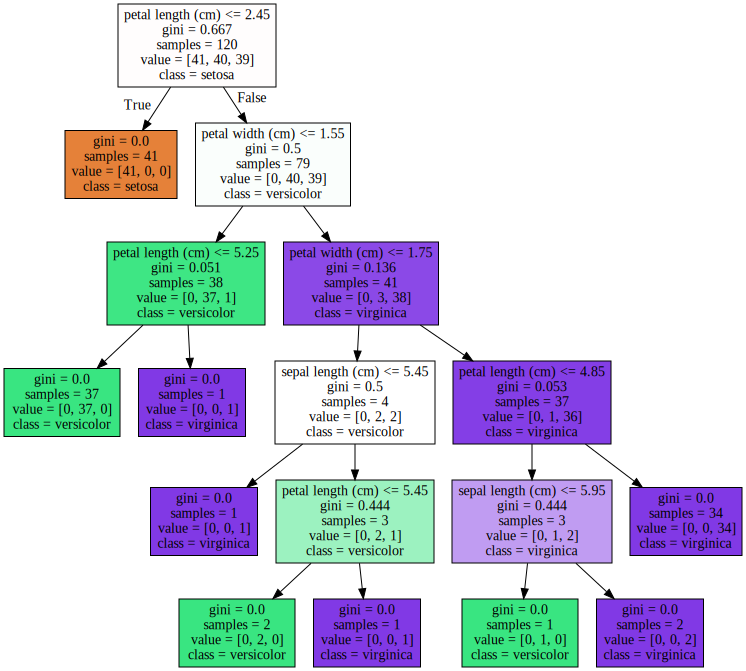

In [6]:
with open('tree.dot','r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [8]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
import seaborn as sns
import numpy as np

In [10]:
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name}: {value}')

sepal length (cm): 0.02500520941862888
sepal width (cm): 0.0
petal length (cm): 0.5549028149313102
petal width (cm): 0.42009197565006084


<AxesSubplot:>

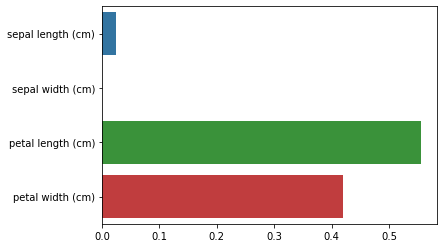

In [11]:
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

In [12]:
# 분류를 위한 데이터를 만들어내는 방법 
# 여러가지 상황에 맞는 데이터를 만들어 낼 수 있다.
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [13]:
# n_features : 만들 클래스의 수
# n_redundant : 
#

X_features, y_labels = make_classification(n_features=2,n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=0)

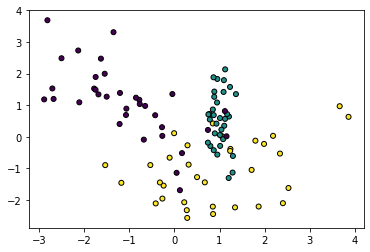

In [14]:
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25, edgecolors='k')

In [15]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)

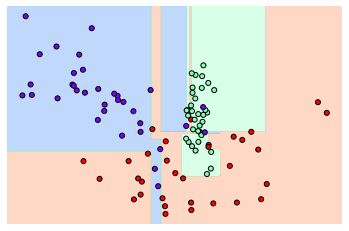

In [18]:
visualize_boundary(dt_clf,X_features,y_labels)

In [19]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)

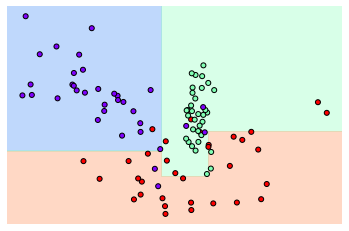

In [20]:
visualize_boundary(dt_clf,X_features,y_labels)